In [1]:
#include <lodepng_config_cling.h>
#include <xwidgets/xslider.hpp>
#include <iostream>
#include <fstream>
#include "nlohmann/json.hpp"
#include <xtl/xbase64.hpp>
#include <xcpp/xdisplay.hpp>

In [2]:
bool active = false;
xw::slider<int> slider;

auto id = xeus::new_xguid();

In [3]:
namespace im
{
    struct image2
    {   
        inline image2(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);   
            m_buffer << fin.rdbuf();
        }
        
        std::stringstream m_buffer;
    };
    
    xeus::xjson mime_bundle_repr(const image2& i)
    {
        auto bundle = xeus::xjson::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

A Jupyter widget

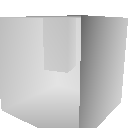

In [4]:
slider.display();
XOBSERVE(slider, value, [](const auto& s) {
    
    im::image2 img("depth-1.png");
    if (s.value > 50)
        img = im::image2("depth-2.png");

    xcpp::display(img,id, active);
    active = true;
});
